In [1]:
# dataset
# http://vap.aau.dk/wp-content/uploads/VAPRBGD/README.txt
# https://towardsdatascience.com/how-i-implemented-iphone-xs-faceid-using-deep-learning-in-python-d5dbaa128e1d

import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import load_model
from keras.models import model_from_json, load_model
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout, Lambda, ELU, concatenate, GlobalAveragePooling2D, Input, BatchNormalization, SeparableConv2D, Subtract, concatenate
from keras.activations import relu, softmax
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam, RMSprop, SGD
from keras.regularizers import l2
from keras import backend as K

Using TensorFlow backend.


In [2]:
with open('model_architecture.json', 'r') as f:
    model_final = model_from_json(f.read())
model_final.load_weights('model_weights.h5')
model_final.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 200, 200, 4)  0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 200, 200, 4)  0                                            
__________________________________________________________________________________________________
model_2 (Model)                 (None, 128)          32039552    input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 1)            0           model_2[1][0]                    
          

In [3]:
def create_input_rgbd(file_path):
  #  print(folder)
    mat=np.zeros((480,640), dtype='float32')
    i=0
    j=0
    depth_file = file_path
    with open(depth_file) as file:
        for line in file:
            vals = line.split('\t')
            for val in vals:
                if val == "\n": continue    
                if int(val) > 1200 or int(val) == -1: val= 1200
                mat[i][j]=float(int(val))
                j+=1
                j=j%640

            i+=1
        mat = np.asarray(mat)
    mat_small=mat[140:340,220:420]
    img = Image.open(depth_file[:-5] + "c.bmp")
    img.thumbnail((640,480))
    img = np.asarray(img)
    img = img[140:340,220:420]
    mat_small=(mat_small-np.mean(mat_small))/np.max(mat_small)
    plt.figure(figsize=(8,8))
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(mat_small)
    plt.show()
    plt.figure(figsize=(8,8))
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.show()
    
    
    
    full1 = np.zeros((200,200,4))
    full1[:,:,:3] = img[:,:,:3]
    full1[:,:,3] = mat_small
    
    return np.array([full1])

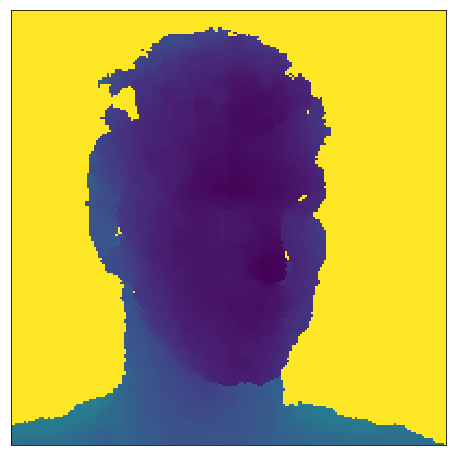

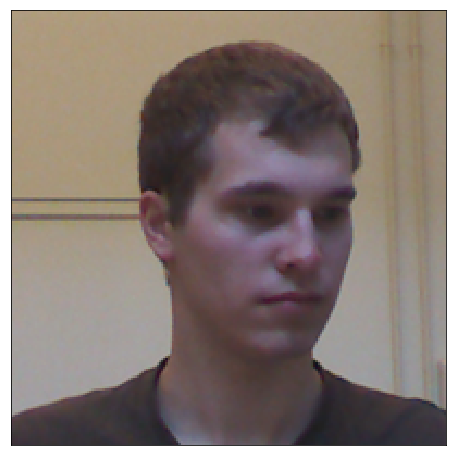

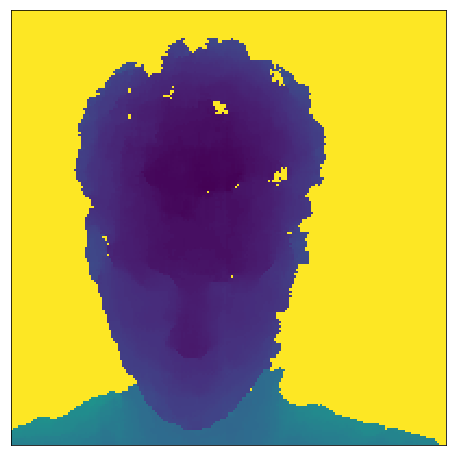

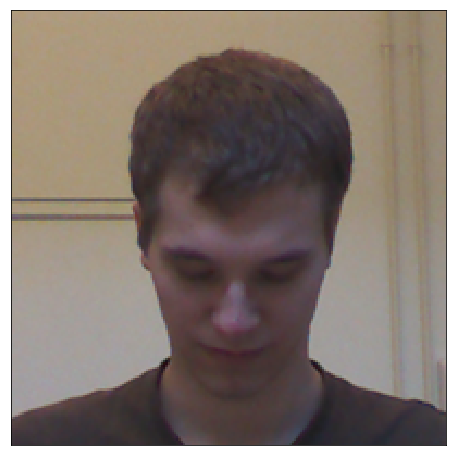

array([[0.04748804]], dtype=float32)

In [4]:
file1 = ('faceid_train/(2012-05-16)(154211)/012_1_d.dat')
inp1 = create_input_rgbd(file1)
file1 = ('faceid_train/(2012-05-16)(154211)/013_1_d.dat')
inp2 = create_input_rgbd(file1)

model_final.predict([inp1, inp2])